initial assignments : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1]
finial assignments : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[(0, [1, 2]), (0, [2, 3]), (0, [2, 1]), (0, [3, 3]), (0, [3, 1]), (0, [4, 5]), (0, [4, 2]), (0, [4, 3]), (0, [4, 6]), (0, [5, 4]), (0, [5, 5]), (0, [6, 5]), (1, [10, 8]), (1, [10, 6]), (1, [10, 7]), (0, [7, 6]), (1, [7, 9]), (1, [11, 5]), (1, [12, 1]), (1, [12, 4]), (1, [12, 3]), (1, [13, 5]), (1, [13, 6]), (1, [14, 9]), (1, [14, 14])]


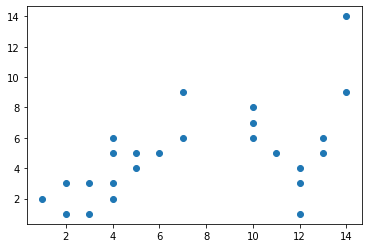

In [24]:

from collections import defaultdict
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt

# 输入点集列表（具有相同维度），返回该点集的中心。
def point_avg(points):
    dimensions = len(points[0]) # 维度
    new_center = [] # 中心集合
    # 计算所有点在每一维度分量的均值，获得中心点坐标
    for dimension in range(dimensions):
        dim_sum = 0  # 记录所有点坐标的当前维度总和
        for p in points:
            dim_sum += p[dimension] # 所有点求和
        new_center.append(dim_sum / float(len(points))) # 计算当前维度的均值，并插入到中心点坐标中
    return new_center

# 输入点集列表data_set和已有的分配assignments (他们相同索引的元素是对应的)
# 计算每一个簇的中心点，返回k个新的中心
def update_centers(data_set, assignments):
    new_means = defaultdict(list) # 初始化字典
    centers = [] # 初始化中心点集合
    # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    # zip()函数形成的列表为：[[type,(x,y)],[type,(x,y)],[type,(x,y)],……,[type,(x,y)]]
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
    # 计算每一类元素的中心点，并添加到centers列表中
    for points in new_means.values():
        centers.append(point_avg(points))
    # 返回中心点集合
    return centers

# 输入所有点的集合data_points以及选取的K个中心点的集合centers
# 通过计算将每个节点分配给一个距离最短的中心点，并输出一个列表，存储有每个节点对应的中心的索引。
# 输出列表形式为：[center_index, center_index, center_index, ……, center_index]
# 对应的点集合为：[point1, point2, point3, ……, pointN]
# 这里data_points和assignments的长度是相等的
def assign_points(data_points, centers):
    assignments = []
    # 遍历点集，获取每一个点距离最近的中心点，并存储其索引。
    for point in data_points:
        shortest = float('inf')  # 最短距离，先初始化为正无穷大
        shortest_index = 0 # 最短距离对应的索引
        for i in range(len(centers)):
            val = distance(point, centers[i]) # 计算当前节点和中心点的距离
            # 找到距离当前节点最近的中心点
            if val < shortest:
                shortest = val
                shortest_index = i
        # 将距离当前节点最近的中心点索引存储到assignments列表中（该列表和存储所有点的列表data_points的索引是对应的！）
        assignments.append(shortest_index)
    return assignments

# 输入两点，计算两点之间的距离并返回
def distance(a, b):
    dimensions = len(a) # 维度
    _sum = 0
    # 分别计算每一维度值的平方并递加
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    # 对平方和开方并返回
    return sqrt(_sum)

# 在节点范围内，随机选取k个点作为聚类中心并返回这k个点
def generate_k(data_set, k):
    centers = [] # 中心列表
    dimensions = len(data_set[0]) # 维度
    min_max = defaultdict(int) # 初始化

    # 遍历全部节点
    for point in data_set:
        # 分别对不同维度进行计算,记录所有点每个维度的最大值和最小值
        for i in range(dimensions):
            val = point[i] # 节点第i维的值
            min_key = 'min_%d' % i # min_0,min_1,min_2,……,min_N
            max_key = 'max_%d' % i # max_0,max_1,max_2,……,max_N
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    # k为函数接收到的参数，表示要分成k类
    for _k in range(k):
        rand_point = []
        # 提取每个维度的最大值和最小值，在最小和最大值的范围内随机生成一个值作为中点
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            # uniform() 方法将随机生成下一个实数，它在 [x, y) 范围内
            rand_point.append(uniform(min_val, max_val))
        # 将生成的中点存储到中点列表中
        centers.append(rand_point)
    return centers

# 输入所有点集dataset以及聚类数目k，
def k_means(dataset, k):
    k_points = generate_k(dataset, k)  # 随机选出k个随机点作为中心
    assignments = assign_points(dataset, k_points) # 将所有点分配给距离最近的中心点
    print("initial assignments : %s" % (assignments))
    old_assignments = None
    # 迭代进行聚类，当两次聚类结果相同时，结束
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments) # 根据当前的分配更新中心点
        old_assignments = assignments # 记录上一次分配结果
        assignments = assign_points(dataset, new_centers) # 将所有点分配给距离最近的中心点
    # 返回最终分类结果（一个存储对应中心点索引的队列）
    print("finial assignments : %s" % (assignments))
    return zip(assignments, dataset)

# 自己设定的数据。
points = [
    [1, 2],
    [2, 3],
    [2, 1],
    [3, 3],
    [3, 1],
    [4, 5],
    [4, 2],
    [4, 3],
    [4, 6],
    [5, 4],
    [5, 5],
    [6, 5],
    [10, 8],
    [10,6],
    [10,7],
    [7,6],
    [7, 9],
    [11, 5],
    [12, 1],
    [12,4],
    [12,3],
    [13,5],
    [13,6],
    [14, 9],
    [14, 14],
    ]
result = k_means(points, 3)
print (list(result))
l1 = []
l2 = []
for i in points:
    l1.append(i[0])
    l2.append(i[1])
plt.scatter(l1,l2)




ValueError: x and y must be the same size

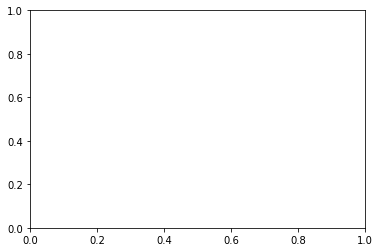

In [27]:



plt.scatter(l1[0:12],l1[12:16],c='red')
plt.scatter(x1,y1, c='blue')